___
# Ciência dos Dados - PROJETO 1

## Lucas Leal Vale
___

## Ordem e Permanecia - Realidade na evolucao do ensino

___
## Introdução

Neste projeto foi analisado como o ensino brasileiro evoluiu, ou não, entre os anos de 2011-2015, com o auxilio de suas respectivas PNADs. Com a finalidade de indicar a segregação social, a falta de compromisso do nosso governo para com as nossas crianças,jovens e adultos e a dificuldade ao acesso de uma educação digna entre todos no país.
Para tanto foram analisados os seguintes aspectos:
O ultimo curso concluido por cada um daqueles que responderam a PNAD

Em respeito às faixas de renda analisadas, procurei dividi-las próximas ao valor do salário mínimo dos respectivos anos por residencia, ou seja, salários de quinhentos e quarenta reais em 2011 e setecentos e quarenta e oito reais em 2015 por pessoa na moradia.
Com essa pesquisa pretendo responder a pergunta:Como se comportou o ensino no brasil entre 2011 e 2015.


___
## Filtros da base de dados

In [1]:
# Importando bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Lucas\Downloads\Insper


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dados=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
#dados11=pd.read_csv('PES2011csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [5]:
# Renomeando as variáveis
df=pd.DataFrame({'Teve algum trabalho no período de referência de 365 dias':dados.V0701,'Frequenta escola ou creche':dados.V0602,'ultimo nivel escolar':dados.V6007,'UF':dados.UF})#,'Trabalho Rural':dados.V0702,'Trabalho em construcacao':dados.V0703,"trabalhu essa semana":dados.V0704})

# Filtrando o DataFrame
df=df.dropna()

dados.V0701=dados.V0701.astype('category')
dados.V0602=dados.V0602.astype('category')

dados.V0701.cat.categories=(['Sim', 'Não'])
dados.V0602.cat.categories=(['Sim', 'Não'])

In [6]:
#Salvando o DataFrame
df.to_csv('variaveis1.csv')
# df11.to_csv('variaveis2.csv')

In [7]:
#Funcao que divide as rendas da pnad entre faixas de salarios minimos para 2015
def faixas2015(df):
    x=df['V4722']
    if x<748: return 1
    elif x<748*2: return 2
    elif x<748*3: return 3
    elif x<748*4: return 4
    elif x<748*5: return 5
    elif x<748*6: return 6
    elif x<748*7: return 7
    elif x<748*8: return 8
    elif x<748*9: return 9
    elif x<748*10: return 10
    return 11
faixas=dados.apply(faixas2015,axis=1)
dados['faixas']=faixas
dados.faixas=dados.faixas.astype('category')
dados.faixas.cat.categories=(['01','02','03','04','05','06','07','08','09','10','+1'])


In [8]:
# Funcao responsavel por dividir a escolaridade em tres principais faixas
def faixasEscolaridade(df):
    x=df['V6007']
    if x<1: return 1 #Elementar (primário)
    elif x<2: return 2 #Médio 1º ciclo (ginasial, etc.)
    elif x<3: return 2 #Médio 2º ciclo (científico, clássico, etc.)
    elif x<4: return 1#Regular do ensino fundamental ou do 1º grau
    elif x<5: return 2#Regular do ensino médio ou do 2º grau
    elif x<6: return 1#Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau
    elif x<7: return 2#Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau
    elif x<8: return 3#Superior - graduação
    elif x<9: return 3#Mestrado ou doutorado
    elif x<10: return 1#Alfabetização de jovens e adultos
    elif x<11: return 1# Creche
    elif x<12: return 1# Classe de alfabetização - CA 
    elif x<13: return 1# Maternal, jardim de infância etc.
    return 1#Não aplicável, ou seja nao tem escolaridadeMaternal, jardim de infância etc.

dados.V6007=dados.V6007.astype('category')
dados.V6007.cat.categories=(['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior - graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.'])


In [9]:
# h=pd.crosstab(dados.faixas,dados.V6007)
# h

Regular do ensino médio ou do 2º grau                                            78221
Regular do ensino fundamental ou do 1º grau                                      66183
Superior - graduação                                                             34292
Elementar (primário)                                                             29339
Médio 1º ciclo (ginasial, etc.)                                                   5654
Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau           4664
Médio 2º ciclo (científico, clássico, etc.)                                       3381
Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau     2743
Mestrado ou doutorado                                                             1917
Classe de alfabetização - CA                                                      1232
Alfabetização de jovens e adultos                                                  763
Creche                                     

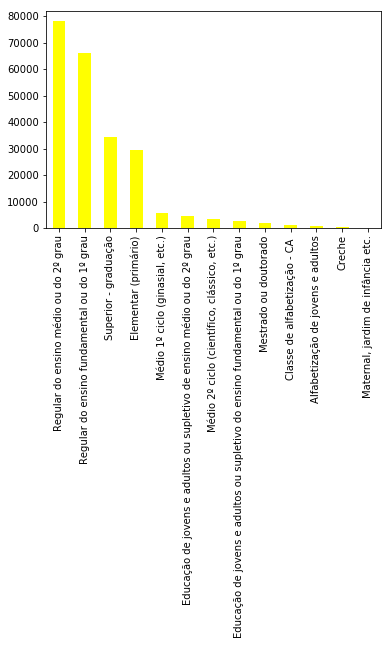

In [11]:

# Value counts realisado para trazer uma nocao sobre as faixas mais presentes na realidade dos brasileiros.
bia2=dados.V6007.value_counts()
bia2.plot(kind='bar', color=('yellow', 'salmon', 'blue', 'red', 'green'),  legend=False)
bia2

()

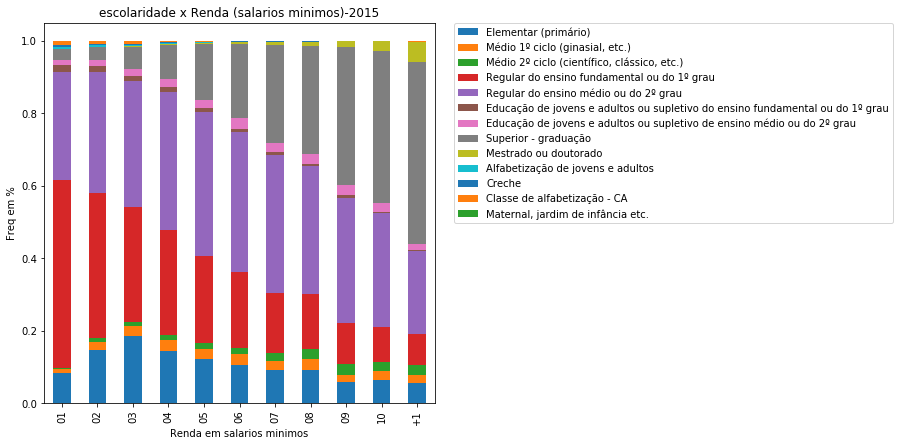

In [12]:
#O proposito do proximo grafico é evidenciar o quanto a renda influencia na escolaridade do brasileiro em 2015
ph=pd.crosstab(dados.faixas,dados.V6007,normalize='index')
a=ph.plot(kind='bar',stacked='True',legend=['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior - graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.']
,title='escolaridade x Renda (salarios minimos)-2015',figsize=(7,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq em %')
plt.xlabel('Renda em salarios minimos')
()

In [13]:
# dados.V6007.describe()

In [14]:
# adicionando uma segunda pnad para uma analise temporal do problema da educacao brasileira
dados2011=pd.read_csv('PES2011csv.zip', compression='zip', header=0, sep=',', quotechar='"')
df2011=pd.DataFrame({'Teve algum trabalho no período de referência de 365 dias':dados2011.V0701,'Frequenta escola ou creche':dados2011.V0602,'ultimo nivel escolar':dados2011.V6007})#,'Trabalho Rural':dados.V0702,'Trabalho em construcacao':dados.V0703,"trabalhu essa semana":dados.V0704})
df2011=df2011.dropna()
df2011.to_csv('variaveis2011.csv')

In [15]:
# dados.V6007.describe()


In [16]:
# dados2011.V6007.describe()

In [17]:
dados2011.V0701=dados2011.V0701.astype('category')
dados2011.V0602=dados2011.V0602.astype('category')

dados2011.V0701.cat.categories=(['Sim', 'Não'])
dados2011.V0602.cat.categories=(['Sim', 'Não'])
#df2011.head()

In [18]:
#Funcao que divide as rendas da pnad entre faixas de salarios minimos para 2011
def faixas20(df):
    x=df['V4722']
    if x<540: return 1
    elif x<540*2: return 2
    elif x<540*3: return 3
    elif x<540*4: return 4
    elif x<540*5: return 5
    elif x<540*6: return 6
    elif x<540*7: return 7
    elif x<540*8: return 8
    elif x<540*9: return 9
    elif x<540*10: return 10
    return 11

faixas2011=dados2011.apply(faixas20,axis=1)
dados2011['faixas2011']=faixas2011
dados2011.faixas2011=dados2011.faixas2011.astype('category')
dados2011.faixas2011.cat.categories=(['01','02','03','04','05','06','07','08','09','10','+1'])

In [19]:
# renomeando algumas das variaveis
dados2011.V6007=dados2011.V6007.astype('category')
dados2011.V6007.cat.categories=(['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior - graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.'])


()

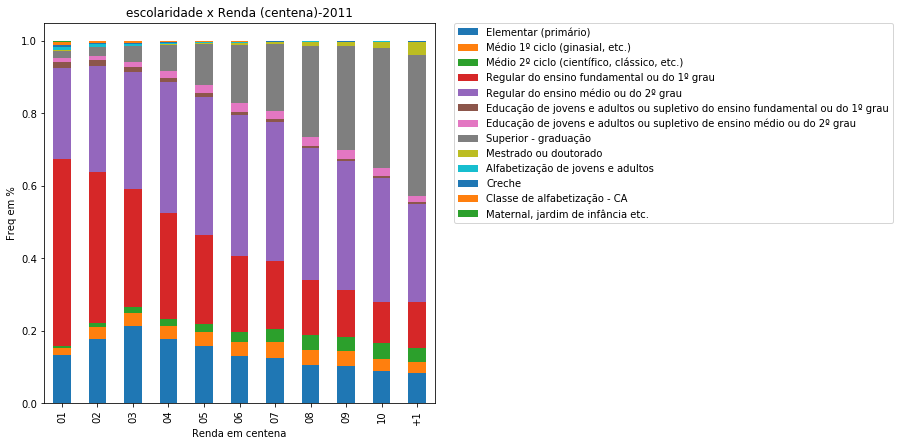

In [20]:
#O proposito do proximo grafico é evidenciar o quanto a renda influencia na escolaridade do brasileiro, igualmente ao anterior porem em 2011
plot2011=pd.crosstab(dados2011.faixas2011,dados2011.V6007,normalize='index')
b=plot2011.plot(kind='bar',stacked='True',legend=['Sim','Não'],title='escolaridade x Renda (centena)-2011',figsize=(7,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq em %')
plt.xlabel('Renda em centena')

()

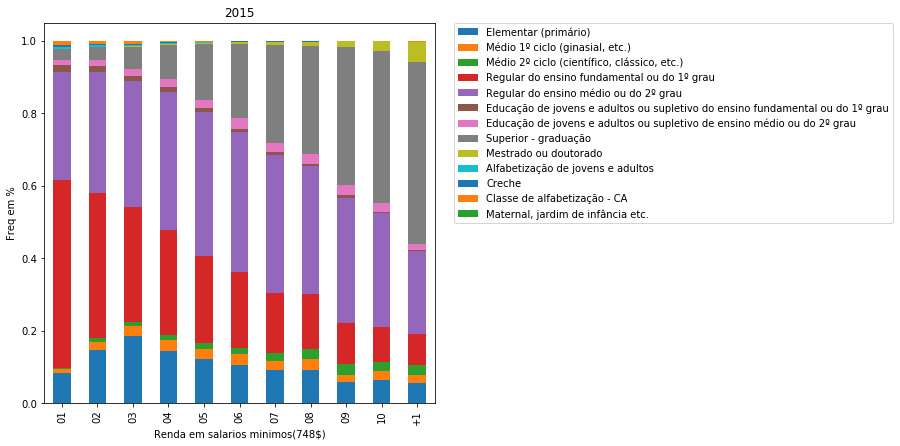

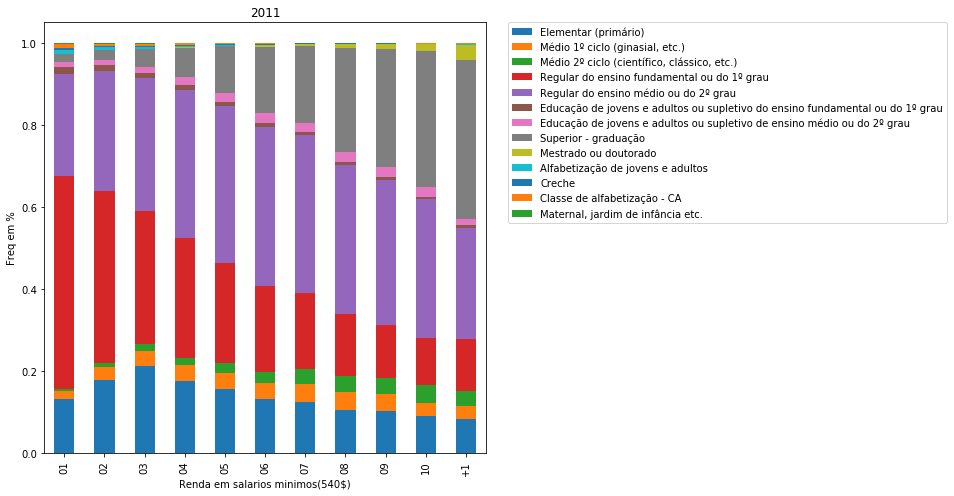

In [21]:
# colocando os dois graficos juntos para melhor comparacao
# Panorama geral do nivel da educacao brasileira
fig=plt.figure(figsize=(7,7))

#plt.subplot(121)
plot=ph.plot(kind='bar',stacked='True',legend=['Sim','Não'],title='escolaridade x Renda (centena)-2015',figsize=(7,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq em %')
plt.xlabel('Renda em salarios minimos(748$)')
plt.title('2015')

#plt.subplot(122)
plot=plot2011.plot(kind='bar',stacked='True',legend=['Sim','Não'],title='escolaridade x Renda (centena)-2011',figsize=(7,7))
plt.title('2011')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq em %')
plt.xlabel('Renda em salarios minimos(540$)')
plt.tight_layout()
plt.show()

In [22]:
# Funcao responsavel por alocar os estados em suas respectivas regioes
def regiao(df):
    x=df['UF']
    if x==11: return 1 #Rondônia
    elif x==12: return 1 #Acre
    elif x==13: return 1 #amazonas
    elif x==14: return 1#roraima
    elif x==15: return 1#para
    elif x==16: return 1#amapa
    elif x==17: return 1#tocantins
    elif x==21: return 2#maranhao
    elif x==22: return 2#piaui
    elif x==23: return 2#ceara
    elif x==24: return 2#rio grande do norte 
    elif x==25: return 2# paraiba
    elif x==13: return 2#pernambuco  
    elif x==27: return 2#alagoas
    elif x==28: return 2#sergipe
    elif x==29: return 2#bahia
    elif x==31: return 3#minas gerais 
    elif x==32: return 3# espirito santo
    elif x==33: return 3# rio de janeiro
    elif x==35: return 3 #sao paulo
    elif x==41: return 4#parana
    elif x==42: return 4#santa catarina
    elif x==43: return 4#rio grande do sul
    elif x==50: return 5#mato grosso do sul
    elif x==51: return 5#mato grosso
    elif x==52: return 5#goias
    elif x==53: return 5#distrito federal
    return 6


In [25]:
# Criando a variavel regioes nos dataframes
regioes=dados.apply(regiao,axis=1)


dados['regioes']=regioes
dados.regioes=dados.regioes.astype('category')
dados.regioes.cat.categories=(['norte','nordeste','sudeste','sul','centro-oeste','outra'])
#dadosNordeste=dados[]

regioes2011=dados2011.apply(regiao,axis=1)

dados2011['regioes2011']=regioes2011
dados2011.regioes2011=dados2011.regioes2011.astype('category')
dados2011.regioes2011.cat.categories=(['norte','nordeste','sudeste','sul','centro-oeste','outra'])


()

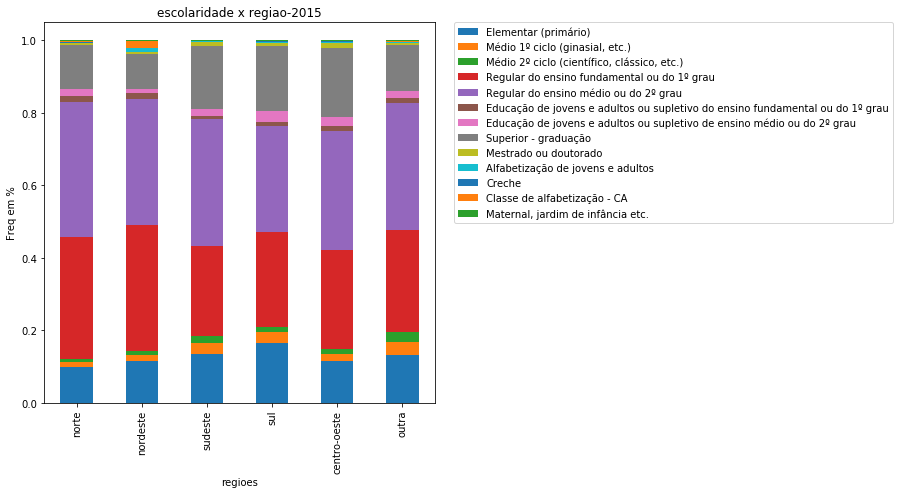

In [26]:
#plotando a diferenca dos niveis de escolaridade entre as diferentes regioes brasileiras em 2015
hello=pd.crosstab(dados['regioes'],dados.V6007,normalize='index')
c=hello.plot(kind='bar',stacked='True',legend=['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior - graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.']
,title='escolaridade x regiao-2015',figsize=(7,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq em %')
plt.xlabel('regioes')
()

()

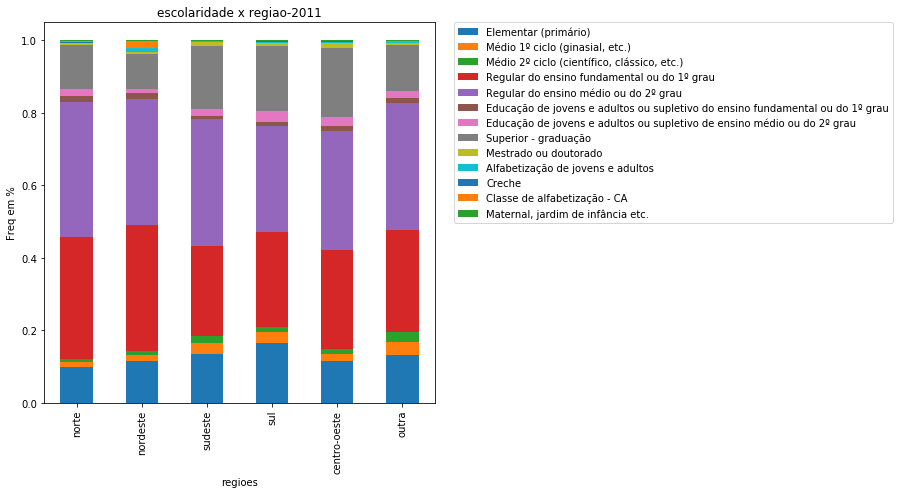

In [27]:
#plotando a diferenca dos niveis de escolaridade entre as diferentes regioes brasileiras em 2011
hello2011=pd.crosstab(dados2011['regioes2011'],dados2011.V6007,normalize='index')
ce=hello.plot(kind='bar',stacked='True',legend=['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior - graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.']
,title='escolaridade x regiao-2011',figsize=(7,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq em %')
plt.xlabel('regioes')
()

In [28]:
### a taxa de pessoas que concluiram o ensino medio entre cada estado ao longo dos anos

In [30]:
#plot = dados.V6007[d.INFRAESTRUTURA=='Nao'].plot.hist(bins=faixa,title='Não tem Infraestrutura em 2013', normed=1, alpha=0.5)

___
## Análise e Resultados

___
## Conclusão 

Descreva aqui suas conclusões!